<b><div style="text-align:right">Алексей Бебчик&nbsp;&nbsp;</div><b>
### Курс 6. Желтое такси. Неделя 4. Прогнозирование ряда со сложной сезонностью  
(задание, оцениваемое сокурсниками)




### Часть 4. Итог (обобщение данных, формирование файла для Kaggle)

<a href="https://www.coursera.org/learn/data-analysis-project/peer/zp6d0/proghnozirovaniie-bol-shogho-kolichiestva-riadov">Задание</a>


8.Загрузите полученный файл на kaggle: <a href="https://inclass.kaggle.com/c/yellowtaxi">https://inclass.kaggle.com/c/yellowtaxi</a>. Добавьте в ноутбук ссылку на сабмишн.
9.Загрузите ноутбук в форму.

In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os                                     #для проверки существования файлов
import datetime as dt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


__ Загрузим уже агрерированные данные за 2016 год (файл с таким именем прилагается к работе)__

In [2]:
#Имя файла с данными для формирования и загрузки
reg_fname = 'regions.csv'
w4_fname  = 'K6_w4_tripdata_2016'

<center>__Загружаем рассчитанные данные и готовим ответ__</center>

In [5]:
#Загружаем результаты кластеризации
reg_clust_all = pd.read_csv(w4_fname+'_reg_clust.csv', sep=',') #считаем из файлоа

data_reg = pd.DataFrame(reg_clust_all.region.unique(), columns=['region']) 
data_reg['reg_clust'] = np.array(data_reg.merge(reg_clust_all, how ='left', on = ['region']).label.fillna(0), int)

clust_list = list(sorted(data_reg.reg_clust.unique()))

In [26]:
cNF_cols     = ['cN','cF', 'cNF']
pred_cols    = ['cN','cF','cNF', 'region', 'num', 'dt_start', 'done', 'time', 'hour_num',
                'pred_trips0', 'dt_hour', 'pred_trips', 'real_trips', 'delta_trips', 'delta_trips_abs']
reg_cols     = ['cN','cF','cNF','region','reg_clust','one_clust', 'done', 'Q']

In [27]:
pred = pd.DataFrame(columns = pred_cols)
reg  = pd.DataFrame(columns = reg_cols)

for cNi in clust_list[:]:
   
    #два фолда
    for cFi in range(1,3):

        cNFi = int(str(cNi)+str(cFi))

        pred_fname = w4_fname+'_c'+str(cNFi)+'_pred.csv' #предсказанные данные, разложенные по датам
        if os.path.exists(pred_fname) == True:
            tmp_pred = pd.read_csv(pred_fname, sep=',', parse_dates=['dt_start', 'dt_hour']) 
            tmp_pred['cN']  = cNi
            tmp_pred['cF']  = cFi
            tmp_pred['cNF'] = cNFi
            pred = pd.concat([pred, tmp_pred])
        else: print 'no file "' + pred_fname + '"'

        reg_fname = w4_fname+'_c'+str(cNFi)+'_reg.csv'
        if os.path.exists(reg_fname) == True:
            tmp_reg = pd.read_csv(reg_fname, sep=',')  #регионы, их кластеры, качество предсказания
            tmp_reg['cN']  = cNi
            tmp_reg['cF']  = cFi
            tmp_reg['cNF'] = cNFi
            reg = pd.concat([reg, tmp_reg])
        else: print 'no file "' + reg_fname + '"'

C:\Users\anna8\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

C:\Users\anna8\Anaconda2\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False



In [28]:
pred = pred[pred_cols]
for c in cNF_cols+['region','done','num']: pred[c] = pred[c].astype(int)
    
reg = reg[reg_cols]
for c in ['region','reg_clust','one_clust','done']: reg[c] = reg[c].astype(int)

Запишем обобщенные по всем кластерам и фолдам в отдельные итоговые файлы данные в файл

__Ответ на задание__

Посчитайте в ноутбуке ошибку прогноза по следующему функционалу:
$Q_{may} =\frac1{R* 739* 6} \sum\limits_{r=1}^{R} \sum_{T=2016.04.30\,23:00}^{2016.05.31\,17:00} \sum_{i=1}^6 \left| \hat{y}^r_{T|T+i} - y_{T+i}^r \right|.$  


__1. Метрика Q за май__ (Фолд 1)

In [37]:
Q = sum(reg[reg.cF==1].Q)/reg[reg.cF==1].shape[0]

In [39]:
print 'Метрика Q на первом Фолде (май): {:.2f}'.format(Q)

Метрика Q на первом Фолде (май): 27.78


__2. Файл для Kaggle за июнь__ (Фолд 2)

Запишите все прогнозы в файл в формате id,y, где столбец id состоит из склеенных через подчёркивание идентификатора географической зоны, даты конца истории, часа конца истории и номера отсчёта, на который делается предсказание (1-6); столбец y — ваш прогноз.  


In [14]:
# формируем идентификатор: Регион_ДатаЧас_ЧасПрозноза
pred['save_id'] = pred.region.astype(int).astype(str) + '_'+pred.dt_start.dt.strftime('%Y-%m-%d_%H')
# если в часе даты конца истории встречается 0, например, 03, то надо оставить 3 (если 00, то будет 0)
pred['save_id'] = pred.save_id.apply(lambda x:x[:-2]+x[-1:] if x[-2:-1]=='0' else x)
# добавляем номер прогнозного часа от 1 до 6
pred['save_id'] = pred['save_id'] + '_' + pred.hour_num.astype(str).apply(lambda x:x[-1:])

In [17]:
# Сформируем файл с ответом
kaggle_answer = pred[pred.cF==2][['save_id','pred_trips']]
kaggle_answer.columns = ['id','y']
kaggle_answer.to_csv('Alexey_Bebchik_k6w4_answer.csv', index=False)

In [18]:
kaggle_answer.shape[0] # Число записей

437580

Анализ зависимости качества прогноза от размера кластера

In [51]:
reg_grp = reg[reg.cF==2].groupby('reg_clust', as_index=False)[['done','Q']].sum()
reg_grp.columns = ['clust','reg_count', 'Q']

In [87]:
print reg_grp.sort_values(by='reg_count')[['reg_count','Q']]

   reg_count            Q
1          7    25.481958
3         20   540.453315
2         22   217.152909
0         26  1809.720343
4         27  1041.756428


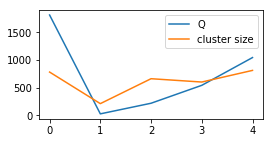

In [92]:
plt.figure(figsize=(4,2))
plt.plot(reg_grp.Q, label ='Q')
plt.plot(reg_grp.reg_count*30, label='cluster size')
plt.xticks(range(0,5))
plt.legend()
plt.show()

В целом, чем больше размер кластера, тем хуже качество прогноза, это вполне разумно (хотя второй кластер не укладывается в эту тенденцию, безусловно, качество зависит и от характеристик рядов внутри кластера).

__ВЫВОД__

В работе была построена система автматизированного расчета подбора параметров модели и прогнозных значений, позволяющая остнавливать и продолжать расчтеы в произвольные моменты времени. 

Исходя из имеющихся вычислительных ресурсов для расчета использовались не оптимальные параметры, а "квазиоптимальные", т.е. те параметры, которые были оптимальны исходя из времени расчета модели неболее одной минуты (на хвосте из 300 значений), что приводило к пронозу одного полного района за один месяц в 15-20 минут. Если есть более мощиные ресурсы и время, то можно использовать лучшие параметры, достигая лучшего результата.

И все же, качество предсказания вышло не очень хорошим. Видимо, следует увеличить количество кластеров. Также в этой работе не использовались некоторые дополнительные данные, такие как праздники, хотя и учитывалась погода.
Возможно, следовало бы предсказывать остатки линейной регрессии, и качество было бы выше, но так задача не ставилась.

Очевидным недостатком полученных моделей является наличие предсказанных отрицательных значений числа поездок, но пока нормально избавиться от них не удалось. Возможно, поможет логорифмирование данных, но это надо проверять.



Файл ответа загружен на __Kaggle__:  __AlexModern__, 83 место (score 36.83). Есть, к чему стремиться. 
Приложен скриншот: __Alexey_Bebchik_Kaggle_Leaderbord_(AlexModern)__

Если Выполнить обозначенные в выводах шаги, представляется, что этот результат, можно значительно улучшить.

P.S. 
Данные о погоде: Weather data in New York City - 2016 Added for the "New York City Taxi Trip Duration" challenge     
https://www.kaggle.com/mathijs/weather-data-in-new-york-city-2016/data  
Источник данных не самый лучший, т.к. нельзя выбирать период, но для рассматриваемого периода данных хватило.